# Cross-Entropy

在机器学习领域中, 交叉熵主要当做损失函数(loss function)

- KL 散度(KL divergence), 计算两个概率分布之间的相对熵(relative entropy)
- 交叉熵(cross-entropy), 计算两个概率分布之间的总熵

交叉熵与逻辑损失(logistic loss)有关, 并且经常混淆他们. 虽然这两个度量源自不同的来源, 但当用作分类模型的损失函数时, 这两个度量计算的结果是相同的, 可以互换使用.


## What Is Cross-Entropy

交叉熵是在给定随机变量或事件集的情况下, 两个概率分布间有多不同的一种度量.

从上面的定义我们可以直观的说, 当 P 作为目标概率分布, Q 表示估计的概率分布, 那么交叉熵表示 Q(估计) 据 P(实际) 有多少比特(bits)单位的数量. 公式可以写作:

$$
H(P, Q)
$$

交叉熵可以使用 P 的事件概率和 Q 的事件概率来计算

$$
H(P, Q) = -\sum_{x \in X} P(x) * log(Q(x))
$$

## Cross-Entropy Versus KL Divergence

交叉熵不是 KL 散度.

交叉熵与散度的度量有关, 散度量化了一个分布于另一个分布的差异程度.

具体来说, KL 散度测量的是一个与交叉熵非常相似的量. KL 散度测量用 Q 代替 P 表示消息所需的平均额外比特数, 而不是总比特数.

因此 KL 散度通常也称为 "相对熵" (relative entropy)

- **交叉熵**: 一个事件使用 Q 代替 P 来表示所需要的总得平均比特数.
- **相对熵**: 一个事件使用 Q 代替 P 来表示所需要的额外平均比特数.

$$
KL(P || Q) = -\sum_{x \in X} P(x) * \log(\frac{Q(x)}{P(x)})
$$

因此, 我们可以通过分布的熵加上由 KL 散度计算的额外熵里计算交叉熵

$$
H(P, Q) = H(P) + KL(P || Q)
$$

## How to Calculate Cross-Entropy

### Two Discrete Probability Distributions

考虑一个随机变量有三个离散事件: 红, 绿, 蓝.

P=1.000 Q=1.000


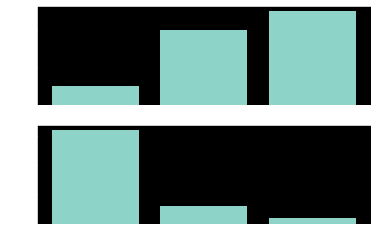

In [3]:
# plot of distributions
from matplotlib import pyplot as plt
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print(f'P={sum(p):.3f} Q={sum(q):.3f}')
# plot first distribution
plt.subplot(2, 1, 1)
plt.bar(events, p)
# plot second distribution
plt.subplot(2, 1, 2)
plt.bar(events, q)
# show the plot
plt.show()


### Calculate Cross-Entropy Between Distribution


In [6]:
# example of calculate cross entropy
from math import log2
# calculate cross entropy
def cross_entropy(p, q):
  return -sum([p[i] * log2(q[i]) for i in range(len(p))])
# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print(f'H(P, Q): {ce_pq:.3f} bits')
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print(f'H(Q, P): {ce_qp:.3f} bits')

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


### Calculate Cross-Entropy Between a Distribution and Itself

如果两个分布相同, 则交叉熵等于分布的熵

In [8]:
# calculate cross entropy H(P, P)
ce_pp = cross_entropy(p, p)
print(f'H(P, P): {ce_pp:.3f} bits')
# calculate cross entropy H(Q, Q)
ce_qq = cross_entropy(q, q)
print(f'H(Q, Q): {ce_qq:.3f} bits')


H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


### Calculate Cross-Entropy Using KL Divergence


In [10]:
# example of calculating cross entropy with KL divergence
from math import log2


# calculate the KL divergence KL(P || Q)
def kl_divergence(p, q):
    return sum([p[i] * log2(p[i] / q[i]) for i in range(len(p))])


# calculate entropy H(P)
def entropy(p):
    return -sum([p[i] * log2(p[i]) for i in range(len(p))])


# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
    return entropy(p) + kl_divergence(p, q)


# define data
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate H(P)
en_p = entropy(p)
print(f'H(P): {en_p:.3f} bits')
# calculate KL Divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print(f'KL(P || Q): {kl_pq:.3f} bits')
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print(f'H(P, Q): {ce_pq:.3f} bits')


H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


## Cross-Entropy as a Loss Function

交叉熵广泛的用作损失函数, 当对分类模型进行优化时.

## References

- [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)